Анализ **датасета** для статпрака. Выполняют Кротов Владимир и Ласкин Михаил

### Цели и задачи проекта  

#### Цель исследования:  
Провести анализ данных абитуриентов Мехмата МГУ 2024 года, чтобы выявить закономерности в распределении баллов, влияние дополнительных критериев (ГТО, индивидуальные достижения) на зачисление, а также обнаружить возможные аномалии (например, списывание на ДВИ).  

#### Основные задачи:  
1. Анализ распределения баллов  
   - Проверить, является ли распределение баллов ЕГЭ (математика, физика, русский язык) и ДВИ нормальным.  
   - Выявить выбросы и аномалии (например, абитуриенты с низкими баллами ЕГЭ, но высокими баллами ДВИ).  

2. Исследование влияния дополнительных баллов  
   - Оценить, как наличие ГТО, аттестата с отличием и других индивидуальных достижений влияет на вероятность зачисления.  
   - Определить, сколько абитуриентов прошли на бюджет благодаря дополнительным баллам.  

3. Корреляционный анализ предметов  
   - Проверить наличие корреляции между баллами по математике и физике.  
   - Исследовать, существует ли зависимость между баллами по русскому языку и профильными предметами.  

4. Выявление аномалий в результатах ДВИ  
   - Сравнить баллы ЕГЭ и ДВИ у абитуриентов: если у кого-то низкие баллы ЕГЭ, но высокие ДВИ, это может указывать на списывание.  
   - Проанализировать, есть ли абитуриенты с подозрительно высокими баллами ДВИ при слабых школьных результатах.  

#### Ожидаемые результаты:  
- Выявление ключевых факторов, влияющих на поступление на Мехмат МГУ.  
- Обнаружение возможных несоответствий в данных (аномально высокие ДВИ при низких ЕГЭ).  
- Понимание взаимосвязи между школьной подготовкой (ЕГЭ) и внутренним экзаменом (ДВИ).  
- Формирование выводов о справедливости и прозрачности вступительной кампании.  

Этот проект может быть полезен будущим абитуриентам, преподавателям и администрации вуза для оптимизации процесса отбора.

## Анализ данных абитуриентов Мехмата МГУ
Проанализируем данные приёмной кампании мехмата МГУ по общему конкурсу.
Посмотрим на сами данные:

In [2]:
import numpy as np
import pandas as pd

In [3]:
entrants = pd.read_excel('math.xlsx', sheet_name='Лист1')
all_sheets = pd.read_excel('math.xlsx', sheet_name=None)
entrants.head()

,№,ID конкурсного заявления,Право\nна общежитие,Сумма баллов,Баллы за\nиндивидуальные достижения,Unnamed: 5,Unnamed: 6,дви,математика,физика,русский,Статус
0,1,11101017850,Да,405,6,2,0,100,100,100,97,Зачислен
1,2,11101025540,Нет,402,6,2,0,100,100,100,94,Зачислен
2,3,11101026263,Нет,399,6,2,0,100,100,100,91,Зачислен
3,4,11101023028,Нет,398,6,2,0,100,97,96,97,Зачислен
4,5,11101018150,Нет,396,6,2,2,100,100,100,86,Зачислен


Для простоты работы со столбцами переименуем их так, чтобы с ними было легче работать. Не будем отказываться полностью от русского языка, но сократим название каждого столбца до одного слова.

In [4]:
entrants.rename(columns = {'Сумма баллов':'сумма',
                           'дви':'ДВИ',
                           'Баллы за\nиндивидуальные достижения':'аттестат',
                           'Unnamed: 5':'сочинение',
                           'Unnamed: 6':'ГТО',
                           'Право\nна общежитие':'общежитие'},
                inplace=True)
entrants.drop('ID конкурсного заявления', axis=1, inplace=True)
entrants.head()

,№,общежитие,сумма,аттестат,сочинение,ГТО,ДВИ,математика,физика,русский,Статус
0,1,Да,405,6,2,0,100,100,100,97,Зачислен
1,2,Нет,402,6,2,0,100,100,100,94,Зачислен
2,3,Нет,399,6,2,0,100,100,100,91,Зачислен
3,4,Нет,398,6,2,0,100,97,96,97,Зачислен
4,5,Нет,396,6,2,2,100,100,100,86,Зачислен


Всегда удобнее работать с типом данных bool, чем с типом данных string. Изменим тип данных в столбцах типа "Да/Нет" на логический:

In [5]:
entrants["общежитие"] = (entrants["общежитие"].replace({'Да': 1}))
entrants["общежитие"] = (entrants["общежитие"].replace({'Нет': 0}))
entrants['Статус'] = entrants['Статус'].replace({'Зачислен': 1})
entrants['Статус'] = entrants['Статус'].replace({'В конкурсе': 0})
entrants.head()

/var/folders/r_/4r5_zc295_3fj27tl5nyd7sc0000gq/T/ipykernel_96706/3897384374.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  entrants["общежитие"] = (entrants["общежитие"].replace({'Нет': 0}))
/var/folders/r_/4r5_zc295_3fj27tl5nyd7sc0000gq/T/ipykernel_96706/3897384374.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  entrants['Статус'] = entrants['Статус'].replace({'В конкурсе': 0})


,№,общежитие,сумма,аттестат,сочинение,ГТО,ДВИ,математика,физика,русский,Статус
0,1,1,405,6,2,0,100,100,100,97,1
1,2,0,402,6,2,0,100,100,100,94,1
2,3,0,399,6,2,0,100,100,100,91,1
3,4,0,398,6,2,0,100,97,96,97,1
4,5,0,396,6,2,2,100,100,100,86,1


In [6]:
entrants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292 entries, 0 to 1291
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   №           1292 non-null   int64
 1   общежитие   1292 non-null   int64
 2   сумма       1292 non-null   int64
 3   аттестат    1292 non-null   int64
 4   сочинение   1292 non-null   int64
 5   ГТО         1292 non-null   int64
 6   ДВИ         1292 non-null   int64
 7   математика  1292 non-null   int64
 8   физика      1292 non-null   int64
 9   русский     1292 non-null   int64
 10  Статус      1292 non-null   int64
dtypes: int64(11)
memory usage: 111.2 KB


Оценим общее описание всех параметров данных

In [7]:
entrants.describe()

,№,общежитие,сумма,аттестат,сочинение,ГТО,ДВИ,математика,физика,русский,Статус
count,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000
mean,646.500000,0.470588,341.261610,2.851393,1.975232,0.656347,71.977554,91.131579,87.484520,85.184985,0.264706
std,373.112584,0.499327,28.406144,2.997477,0.221269,0.939460,16.318204,6.833056,9.628767,8.557311,0.441347
min,1.000000,0.000000,245.000000,0.000000,0.000000,0.000000,50.000000,64.000000,55.000000,60.000000,0.000000
25%,323.750000,0.000000,324.000000,0.000000,2.000000,0.000000,60.000000,86.000000,80.000000,81.000000,0.000000
50%,646.500000,0.000000,340.000000,0.000000,2.000000,0.000000,70.000000,92.000000,90.000000,86.000000,0.000000
75%,969.250000,1.000000,361.000000,6.000000,2.000000,2.000000,85.000000,97.000000,96.000000,91.000000,1.000000
max,1292.000000,1.000000,408.000000,6.000000,2.000000,2.000000,100.000000,100.000000,100.000000,100.000000,1.000000


In [8]:
entrants

,№,общежитие,сумма,аттестат,сочинение,ГТО,ДВИ,математика,физика,русский,Статус
0,1,1,405,6,2,0,100,100,100,97,1
1,2,0,402,6,2,0,100,100,100,94,1
2,3,0,399,6,2,0,100,100,100,91,1
3,4,0,398,6,2,0,100,97,96,97,1
4,5,0,396,6,2,2,100,100,100,86,1
...,...,...,...,...,...,...,...,...,...,...,...
1287,1288,0,383,6,2,0,85,95,98,97,1
1288,1289,1,382,6,2,0,75,99,100,100,1
1289,1290,0,381,6,2,2,90,84,100,97,1
1290,1291,1,381,6,2,2,85,94,98,94,1



Первое, что стоит сделать — посмотреть, как выглядит распределение суммы баллов на гистограмме. Мы увидим, какую структуру имеют данные.

<Axes: >

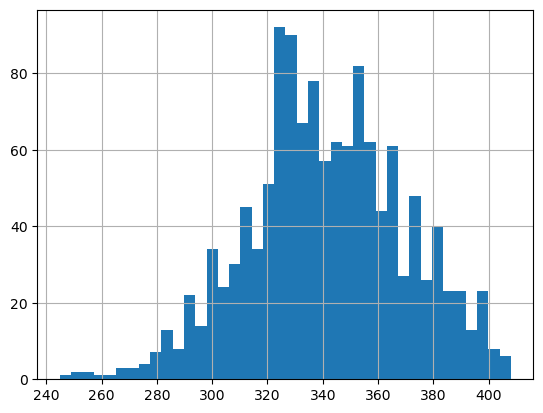

In [9]:
entrants['сумма'].hist(bins=40)

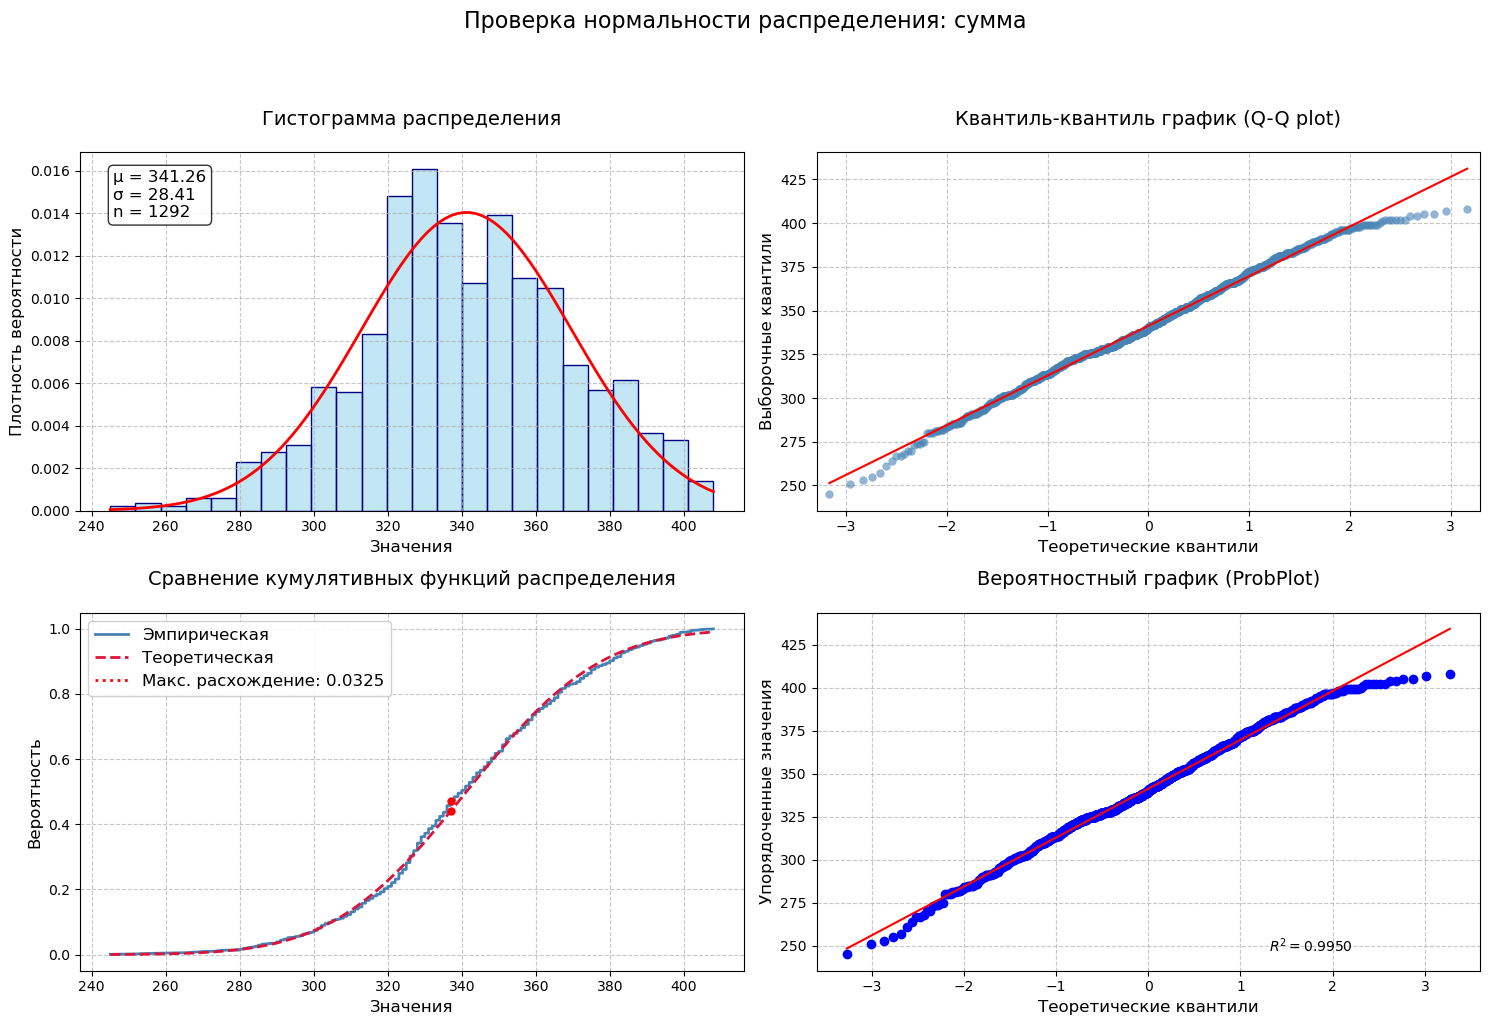

=== Результаты теста Колмогорова-Смирнова ===
Статистика K-S: 0.0325
P-значение: 0.1269
Размер выборки: 1292

Вывод: распределение не отличается от нормального (p > 0.05)


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
def ks_normality_test_with_plots_rus(data, column='сумма', figsize=(15, 10)):
    # Подготовка данных
    sample = data[column].dropna()
    n = len(sample)
    mu, sigma = sample.mean(), sample.std()

    # Выполняем тест
    ks_stat, p_value = stats.kstest((sample - mu)/sigma, 'norm')

    # Создаем графики
    plt.figure(figsize=figsize, facecolor='white')

    # 1. Гистограмма с нормальной кривой
    plt.subplot(2, 2, 1)
    hist = sns.histplot(sample, kde=False, stat='density', alpha=0.5,
                       color='skyblue', edgecolor='navy')
    x = np.linspace(sample.min(), sample.max(), 100)
    plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', lw=2)
    plt.title('Гистограмма распределения', pad=20, fontsize=14)
    plt.xlabel('Значения', fontsize=12)
    plt.ylabel('Плотность вероятности', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)

    # Добавляем аннотацию с параметрами
    textstr = f'μ = {mu:.2f}\nσ = {sigma:.2f}\nn = {n}'
    props = dict(boxstyle='round', facecolor='white', alpha=0.8)
    plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
             fontsize=12, verticalalignment='top', bbox=props)

    # 2. Q-Q график
    plt.subplot(2, 2, 2)
    qqplot(sample, line='s', ax=plt.gca(), marker='o',
           markerfacecolor='steelblue', markeredgecolor='none', alpha=0.6)
    plt.title('Квантиль-квантиль график (Q-Q plot)', pad=20, fontsize=14)
    plt.xlabel('Теоретические квантили', fontsize=12)
    plt.ylabel('Выборочные квантили', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)

    # 3. Сравнение эмпирической и теоретической CDF
    plt.subplot(2, 2, 3)
    x_sorted = np.sort(sample)
    y_empirical = np.arange(1, n+1) / n
    y_theoretical = stats.norm.cdf(x_sorted, mu, sigma)

    plt.plot(x_sorted, y_empirical, label='Эмпирическая', linewidth=2, color='steelblue')
    plt.plot(x_sorted, y_theoretical, label='Теоретическая', linestyle='--', linewidth=2, color='crimson')

    idx_max = np.argmax(np.abs(y_empirical - y_theoretical))
    plt.scatter([x_sorted[idx_max]]*2, [y_empirical[idx_max], y_theoretical[idx_max]],
                color='red', s=25, zorder=10)
    plt.vlines(x_sorted[idx_max], y_empirical[idx_max], y_theoretical[idx_max],
               color='red', linestyle=':', linewidth=2,
               label=f'Макс. расхождение: {ks_stat:.4f}')

    plt.title('Сравнение кумулятивных функций распределения', pad=20, fontsize=14)
    plt.xlabel('Значения', fontsize=12)
    plt.ylabel('Вероятность', fontsize=12)
    plt.legend(fontsize=12, framealpha=0.9)
    plt.grid(True, linestyle='--', alpha=0.7)

    # 4. Boxplot с нормальными квантилями
    plt.subplot(2, 2, 4)
    stats.probplot(sample, dist="norm", plot=plt, rvalue=True)
    plt.title('Вероятностный график (ProbPlot)', pad=20, fontsize=14)
    plt.xlabel('Теоретические квантили', fontsize=12)
    plt.ylabel('Упорядоченные значения', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)

    # Общий заголовок
    plt.suptitle(f'Проверка нормальности распределения: {column}\n',
                 fontsize=16, y=1.02)

    plt.tight_layout()
    plt.show()

    # Вывод результатов теста
    print(f"=== Результаты теста Колмогорова-Смирнова ===")
    print(f"Статистика K-S: {ks_stat:.4f}")
    print(f"P-значение: {p_value:.4f}")
    print(f"Размер выборки: {n}")

    if p_value > 0.05:
        print("\nВывод: распределение не отличается от нормального (p > 0.05)")
    else:
        print("\nВывод:распределение отличается от нормального (p ≤ 0.05)")

# Пример использования
ks_normality_test_with_plots_rus(entrants, column='сумма')

Проверим, такое же распределение получается у студентов, сдавших успешно ГТО? Может быть, ГТО существенно повлияло на их поступление, хотя они менее или более талантливы, чем другие студенты?

342.6556603773585


<Axes: ylabel='Frequency'>

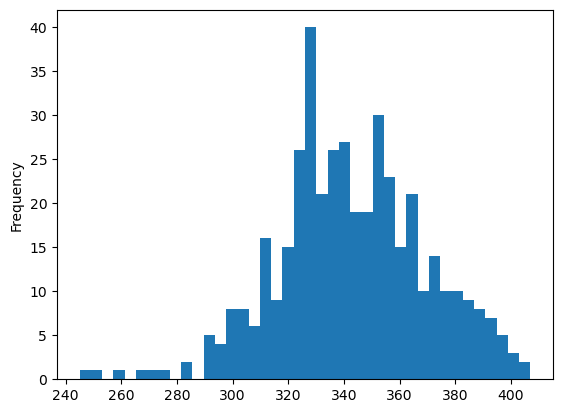

In [11]:
print(entrants.query('ГТО == 2')['сумма'].mean())
entrants.query('ГТО == 2')['сумма'].plot.hist(bins=40)

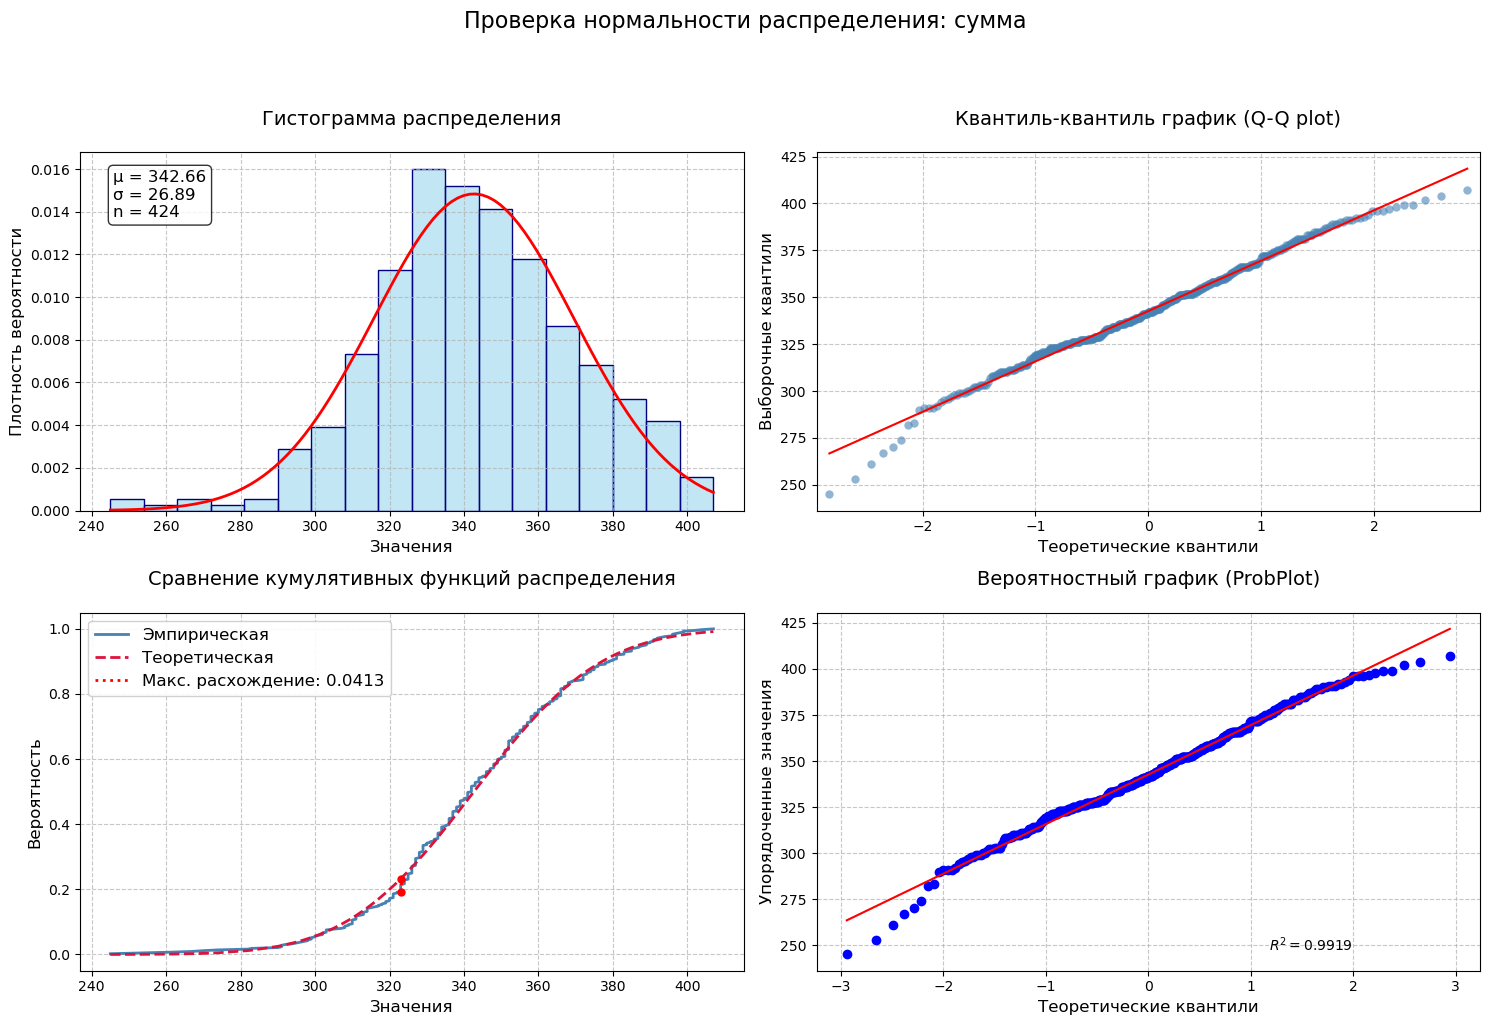

=== Результаты теста Колмогорова-Смирнова ===
Статистика K-S: 0.0413
P-значение: 0.4519
Размер выборки: 424

Вывод: распределение не отличается от нормального (p > 0.05)


In [12]:
ks_normality_test_with_plots_rus(entrants.query('ГТО == 2'), column='сумма')

Видим, что баллы студентов, которые сдали ГТО, имеют нормальное распределение. Хочется сделать вывод, что их результаты более предсказуемы и имеют стабильное распределение.
В целом, ГТО сдают более физически подготовленные студенты, что действительно может коррелировать с дисциплинированностью и стабильностью в учебе.

Как мы видим, распределение очень похоже, имеет тот же максимум. Значит, наша гипотеза неверна. А что насчет несдавших ГТО?

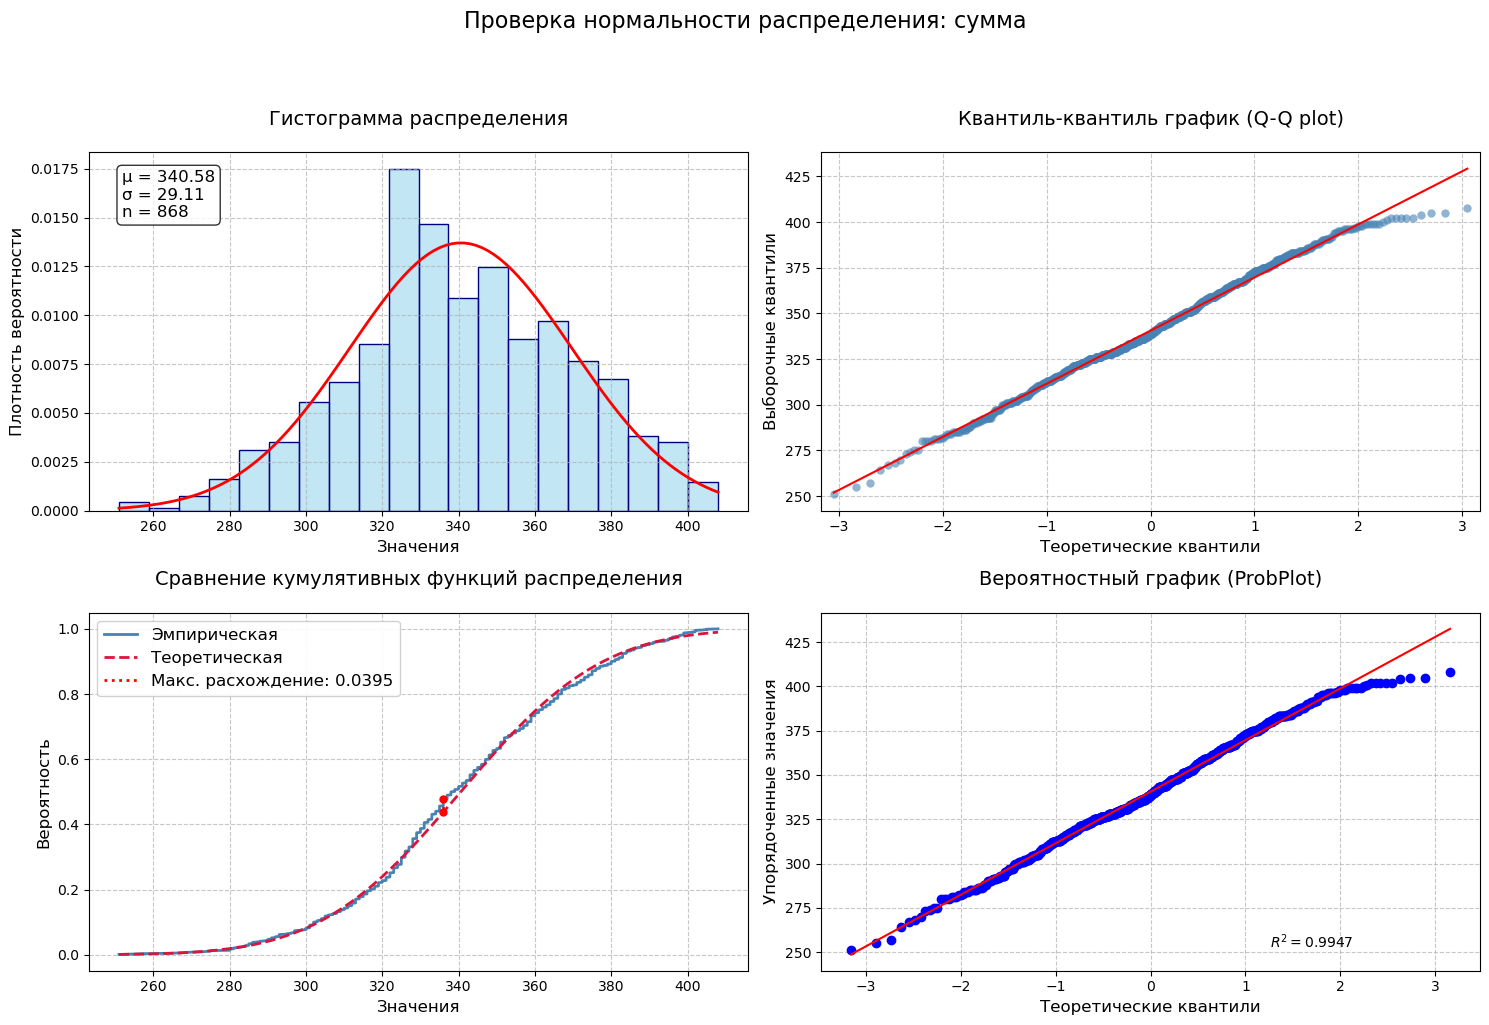

=== Результаты теста Колмогорова-Смирнова ===
Статистика K-S: 0.0395
P-значение: 0.1302
Размер выборки: 868

Вывод: распределение не отличается от нормального (p > 0.05)


In [13]:
ks_normality_test_with_plots_rus(entrants.query('ГТО == 0'), column='сумма')

Видим, что у студентов, которые не сдавали ГТО, баллы тоже имеют нормальное распределение, а различия параметров незначительны. Значит, K-S тест отреагировал на тонкости распределения (скошенность, пики, "тяжелые" хвосты), а сдача ГТО на самом деле не связана с баллами за экзамен.

Посмотрим на марицу корреляций, предварительно переведя все булевые значения в числовые

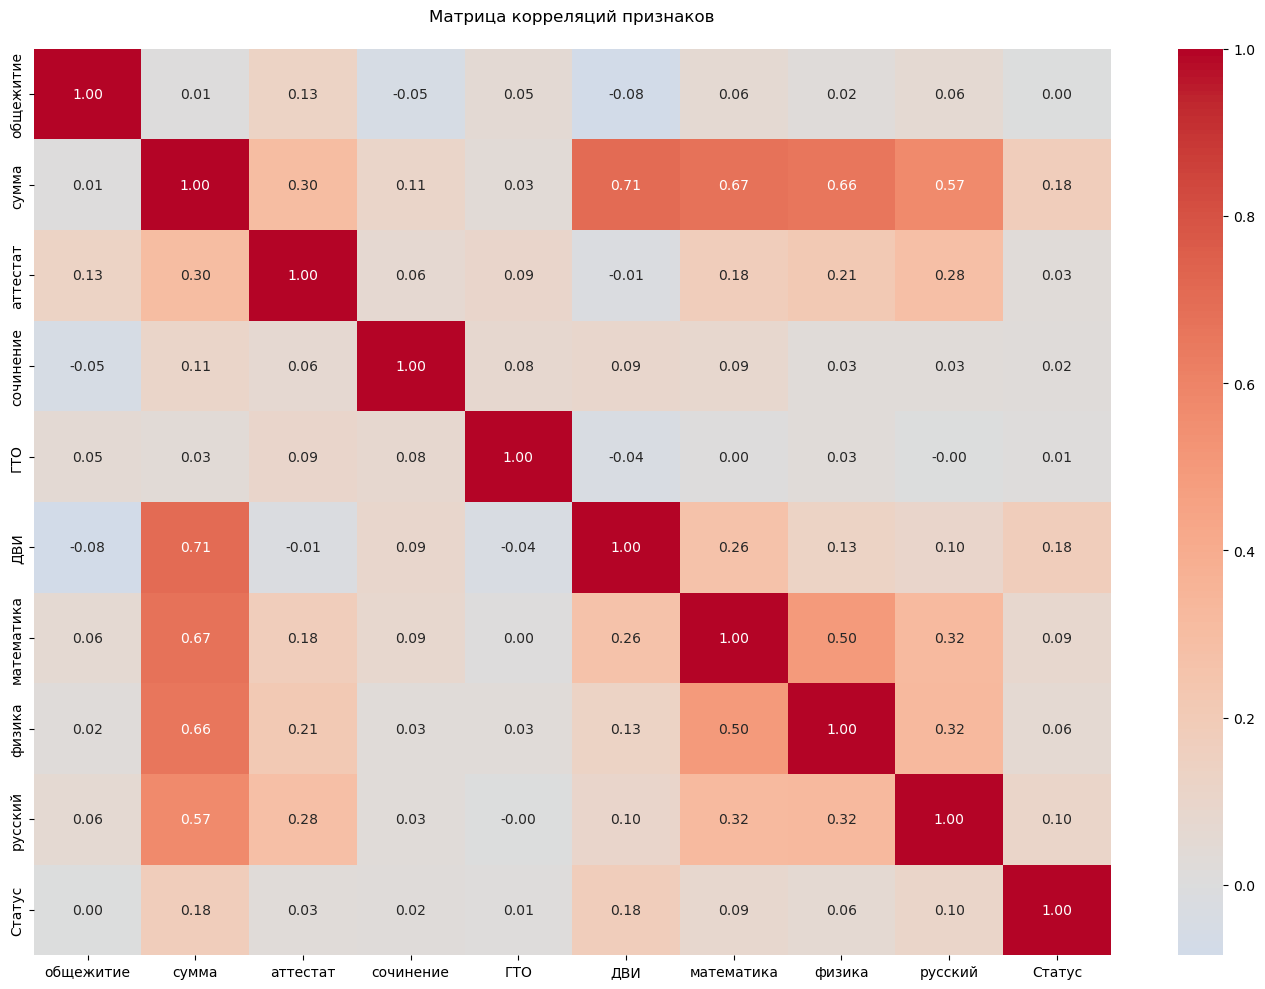

In [14]:
# 2. Таблица корреляций
bool_cols = entrants.select_dtypes(include='bool').columns
entrants[bool_cols] = entrants[bool_cols].astype(int)
corr_df = entrants.drop(['№', 'Статус_код'], axis=1, errors='ignore')

plt.figure(figsize=(14, 10))
corr_matrix = corr_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title('Матрица корреляций признаков', pad=20)
plt.tight_layout()
plt.show()

340.5806451612903


<Axes: ylabel='Frequency'>

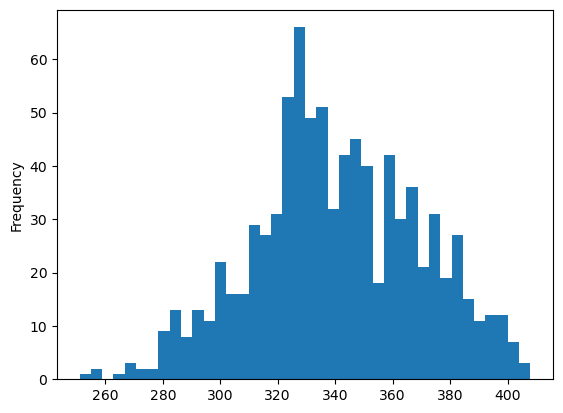

In [15]:
print(entrants.query('ГТО == 0')['сумма'].mean())
entrants.query('ГТО == 0')['сумма'].plot.hist(bins=40)

Посмотрим на сто балльников по ДВИ математике

<Axes: ylabel='Frequency'>

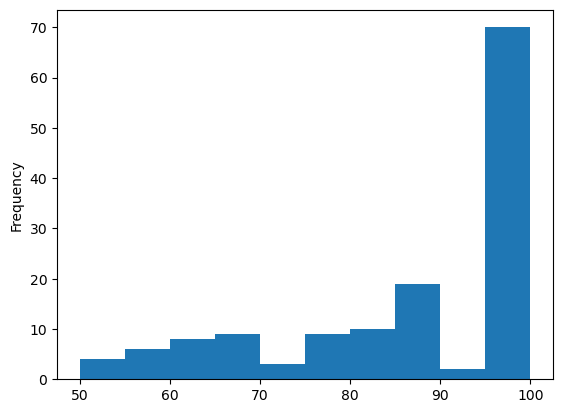

In [16]:
entrants.query("`математика` == 100")["ДВИ"].plot.hist(bins=10)

Выдвинем следующую гипотезу:
студенты, успешно сдавшие ЕГЭ по математике, должны были хорошо сдать и ДВИ. Если это так и если мы отметим всех студентов в координатах "Балл за ДВИ" - "Балл за ЕГЭ по математике", мы должны увидеть скопление в области высоких баллов по обеим осям. Изобразим такой поточечный график:

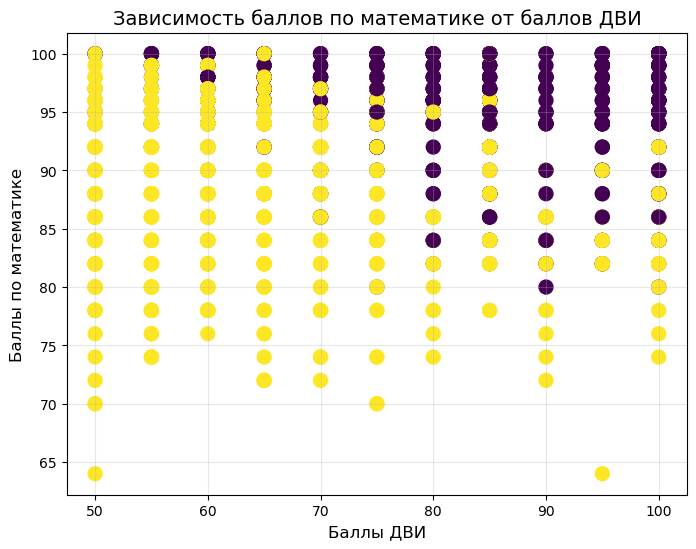

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
features = ['сумма', 'ДВИ', 'математика', 'физика', 'русский']
X = entrants[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
entrants['Кластер'] = clusters

plt.figure(figsize=(8, 6))
plt.scatter(
    x=entrants['ДВИ'],
    y=entrants['математика'],
    c=entrants['Кластер'],
    cmap='viridis',
    s=100
)
plt.title('Зависимость баллов по математике от баллов ДВИ', fontsize=14)
plt.xlabel('Баллы ДВИ', fontsize=12)
plt.ylabel('Баллы по математике', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

Кажется, что распределение баллов по математике при каждом фиксированном балле за ДВИ почти равномерное в области "Балл за математику > 75". Но так ли это в действительности? Может быть, все дело в особенности отображения поточечного графика?

Нарисуем другой тип графика, так называемые "свечи":

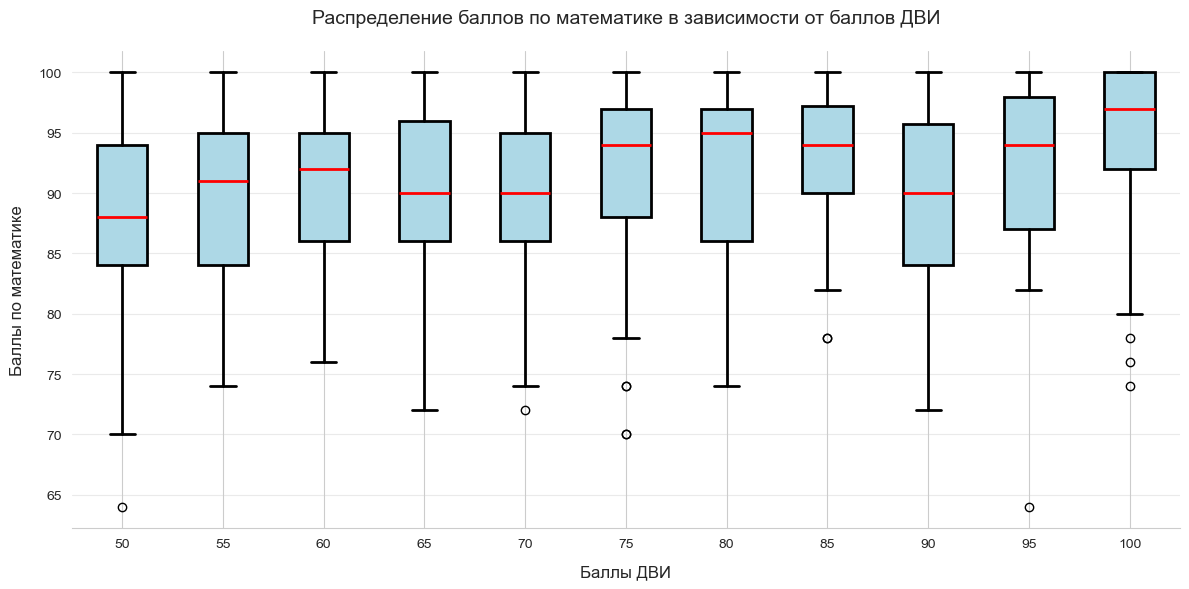

In [18]:
# Создаем сводную таблицу и boxplot
pivot_data = entrants.pivot_table(index='№', columns='ДВИ', values='математика')

# Настраиваем график
plt.figure(figsize=(12, 6))  # Размер графика
sns.set_style("whitegrid")  # Стиль с сеткой

# Рисуем boxplot с улучшенным оформлением
pivot_data.boxplot(
    patch_artist=True,  # Заливка цветом
    boxprops=dict(facecolor='lightblue', linewidth=2),  # Свойства ящиков
    whiskerprops=dict(linewidth=2),  # Свойства усов
    capprops=dict(linewidth=2),  # Свойства ограничителей
    medianprops=dict(color='red', linewidth=2)  # Свойства медианы
)

# Добавляем подписи и заголовок
plt.title('Распределение баллов по математике в зависимости от баллов ДВИ', fontsize=14, pad=20)
plt.xlabel('Баллы ДВИ', fontsize=12, labelpad=10)
plt.ylabel('Баллы по математике', fontsize=12, labelpad=10)

# Настраиваем шрифт подписей на осях
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Добавляем горизонтальную сетку для удобства чтения
plt.grid(axis='y', alpha=0.4)

# Убираем лишние рамки
sns.despine(left=True)

plt.tight_layout()  # Оптимизация расположения элементов
plt.show()

Удалим тех, кто вероятнее всего списывал ДВИ


In [19]:
def remove_outliers(df):
    # Создаем пустой DataFrame для чистых данных
    clean_df = pd.DataFrame()

    # Группируем по баллам ДВИ и обрабатываем каждую группу
    for dvii_score, group in df.groupby('ДВИ'):
        q1 = group['математика'].quantile(0.25)
        q3 = group['математика'].quantile(0.75)
        iqr = q3 - q1

        lower_bound = q1 - 1.5*iqr
        upper_bound = q3 + 1.5*iqr

        # Фильтруем аномальные значения
        filtered_group = group[(group['математика'] >= lower_bound) &
                              (group['математика'] <= upper_bound)]

        clean_df = pd.concat([clean_df, filtered_group])

    return clean_df

# Применяем функцию
cleaned_entrants = remove_outliers(entrants)

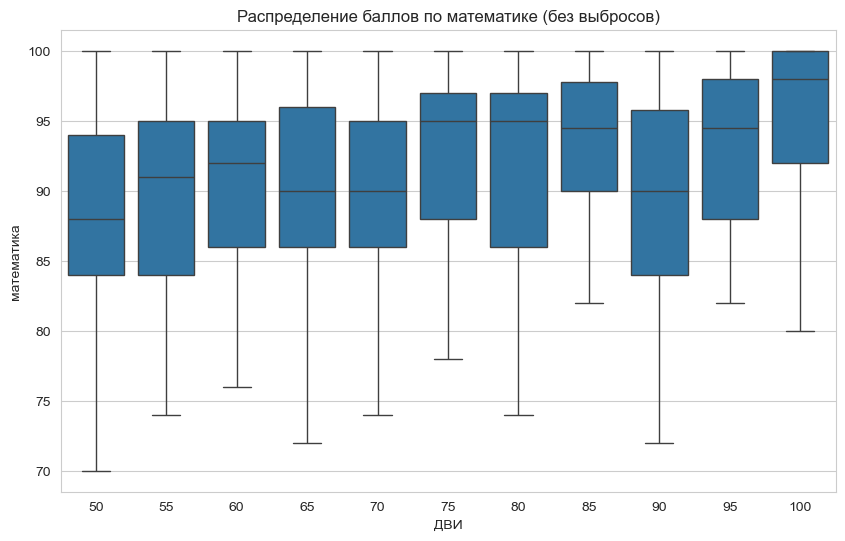

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(x='ДВИ', y='математика', data=cleaned_entrants)
plt.title('Распределение баллов по математике (без выбросов)')
plt.show()

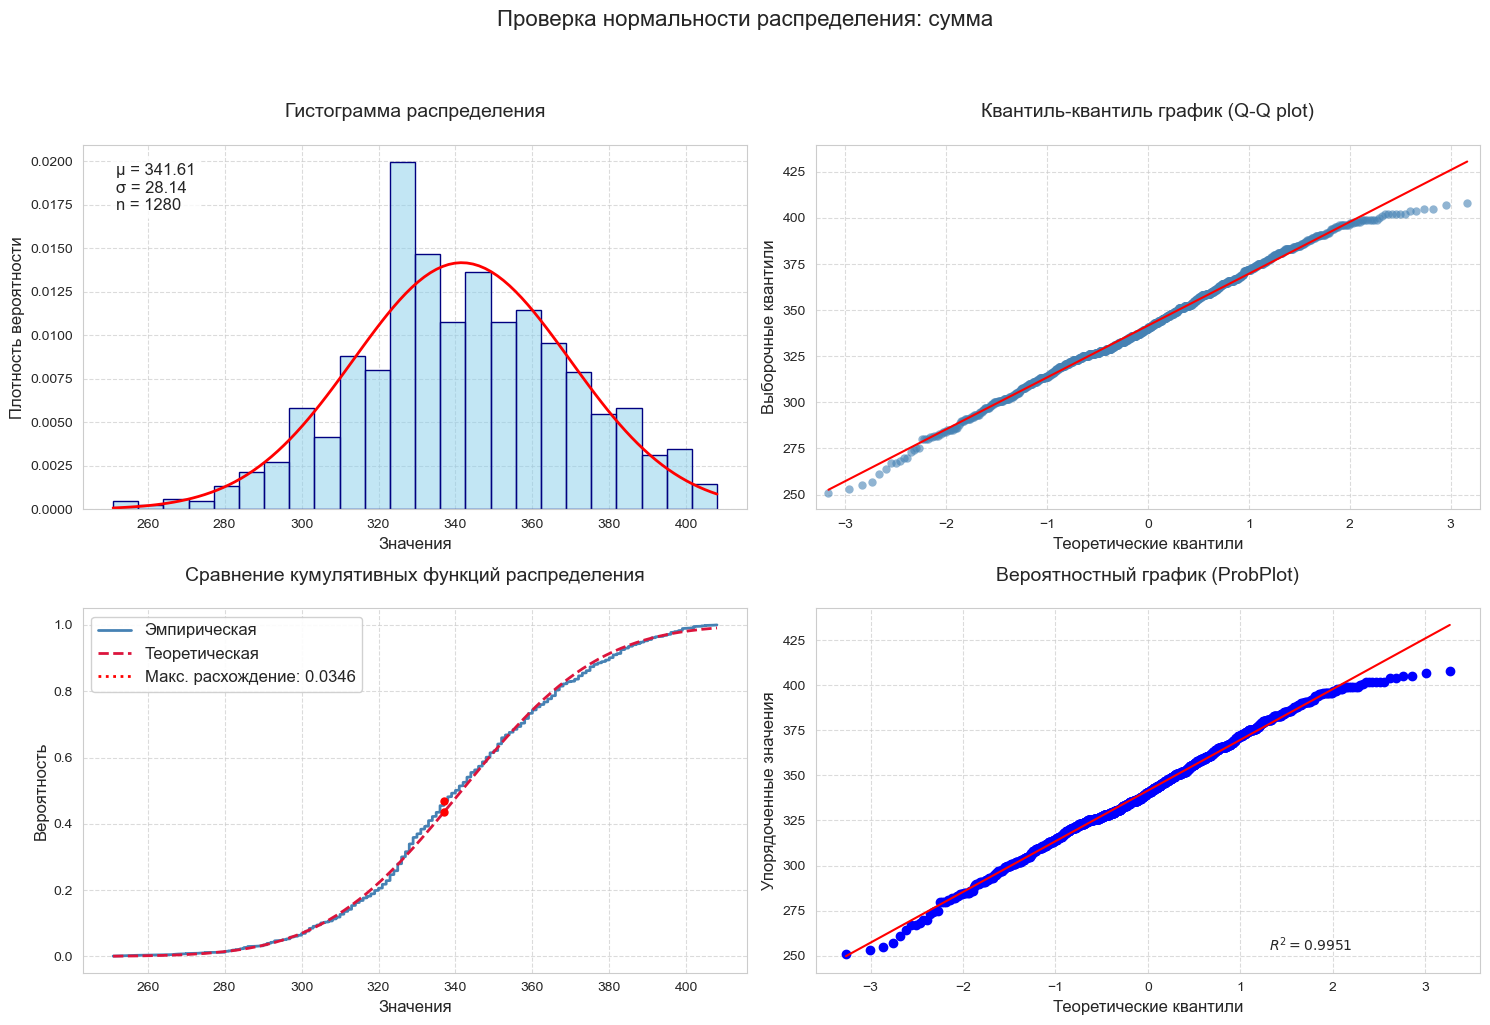

=== Результаты теста Колмогорова-Смирнова ===
Статистика K-S: 0.0346
P-значение: 0.0909
Размер выборки: 1280

Вывод: распределение не отличается от нормального (p > 0.05)


In [21]:
ks_normality_test_with_plots_rus(cleaned_entrants, column='сумма')

Мы действительно наблюдаем смещение медианного значения балла ЕГЭ по математике ближе к 100 при увеличении баллов за ДВИ. Это подтверждает нашу гипотезу. Проверим это, применив усреднение:

In [22]:
cleaned_entrants.pivot_table(index='ДВИ', values='математика', aggfunc='mean')

,математика
ДВИ,
50,88.500000
55,89.400000
60,90.487437
65,90.302521
70,89.990291
75,92.658120
80,92.256757
85,93.436508
90,89.071429


<Axes: xlabel='ДВИ'>

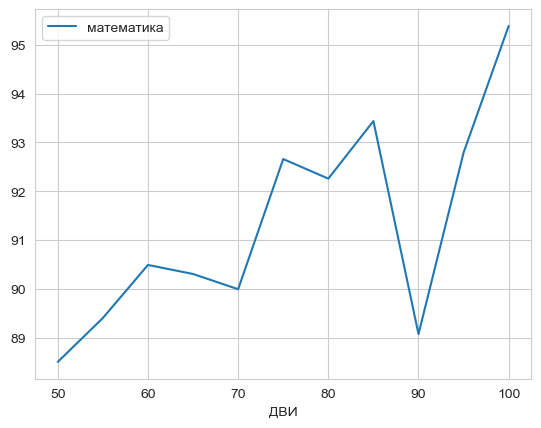

In [31]:
cleaned_entrants.pivot_table(index='ДВИ', values='математика', aggfunc='mean').plot()

Есть ли подобные корелляции в случае с парой "Физика"/"Математика"?

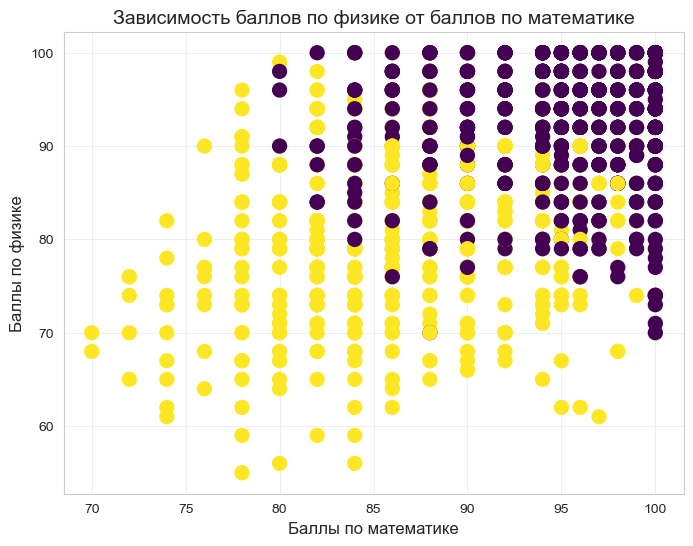

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(
    x=cleaned_entrants['математика'],
    y=cleaned_entrants['физика'],
    c=cleaned_entrants['Кластер'],
    cmap='viridis',
    s=100
)
plt.title('Зависимость баллов по физике от баллов по математике', fontsize=14)
plt.xlabel('Баллы по математике', fontsize=12)
plt.ylabel('Баллы по физике', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

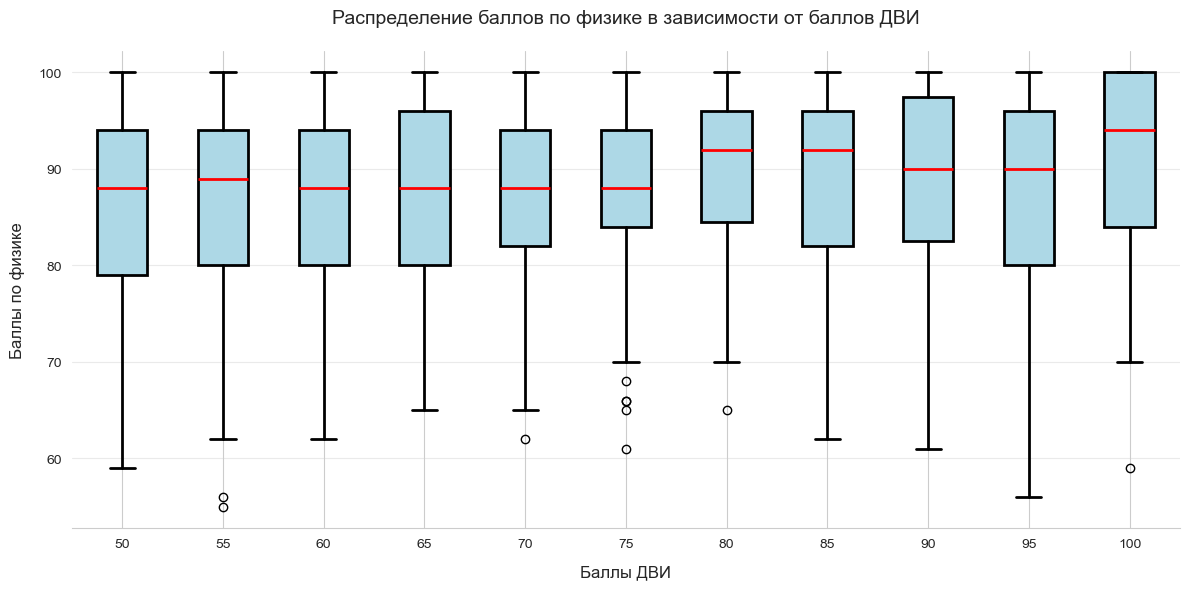

In [32]:
# Создаем сводную таблицу и boxplot
pivot_data = cleaned_entrants.pivot_table(index='№', columns='ДВИ', values='физика')

# Настраиваем график
plt.figure(figsize=(12, 6))  # Размер графика
sns.set_style("whitegrid")  # Стиль с сеткой

# Рисуем boxplot с улучшенным оформлением
pivot_data.boxplot(
    patch_artist=True,  # Заливка цветом
    boxprops=dict(facecolor='lightblue', linewidth=2),  # Свойства ящиков
    whiskerprops=dict(linewidth=2),  # Свойства усов
    capprops=dict(linewidth=2),  # Свойства ограничителей
    medianprops=dict(color='red', linewidth=2)  # Свойства медианы
)

# Добавляем подписи и заголовок
plt.title('Распределение баллов по физике в зависимости от баллов ДВИ', fontsize=14, pad=20)
plt.xlabel('Баллы ДВИ', fontsize=12, labelpad=10)
plt.ylabel('Баллы по физике', fontsize=12, labelpad=10)

# Настраиваем шрифт подписей на осях
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Добавляем горизонтальную сетку для удобства чтения
plt.grid(axis='y', alpha=0.4)

# Убираем лишние рамки
sns.despine(left=True)

plt.tight_layout()  # Оптимизация расположения элементов
plt.show()

Снова удалим всех списывающих

In [26]:
def remove_outliers_2(df):
    # Создаем пустой DataFrame для чистых данных
    clean_df = pd.DataFrame()

    # Группируем по баллам ДВИ и обрабатываем каждую группу
    for dvii_score, group in df.groupby('ДВИ'):
        q1 = group['физика'].quantile(0.25)
        q3 = group['физика'].quantile(0.75)
        iqr = q3 - q1

        lower_bound = q1 - 1.5*iqr
        upper_bound = q3 + 1.5*iqr

        # Фильтруем аномальные значения
        filtered_group = group[(group['физика'] >= lower_bound) &
                              (group['физика'] <= upper_bound)]

        clean_df = pd.concat([clean_df, filtered_group])

    return clean_df

# Применяем функцию
cleaned_entrants_2 = remove_outliers_2(cleaned_entrants)

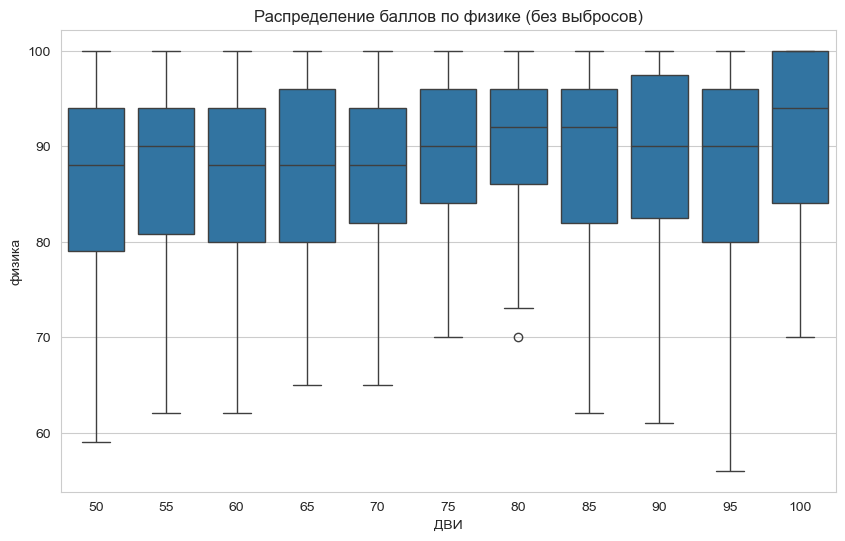

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(x='ДВИ', y='физика', data=cleaned_entrants_2)
plt.title('Распределение баллов по физике (без выбросов)')
plt.show()

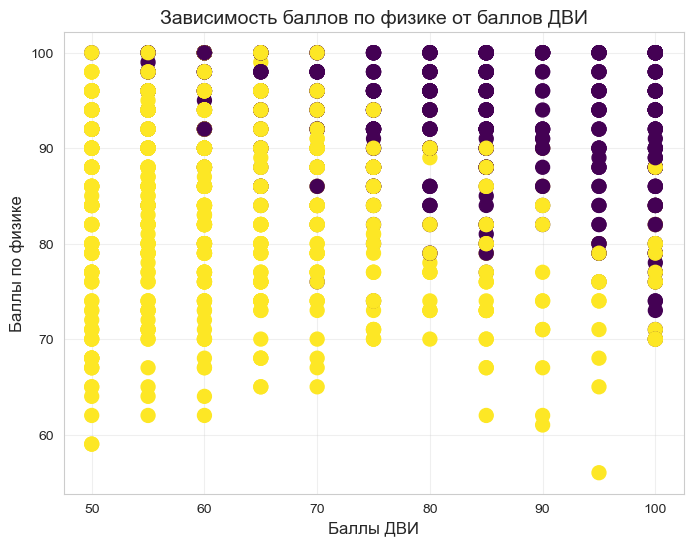

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(
    x=cleaned_entrants_2['ДВИ'],
    y=cleaned_entrants_2['физика'],
    c=cleaned_entrants_2['Кластер'],
    cmap='viridis',
    s=100
)
plt.title('Зависимость баллов по физике от баллов ДВИ', fontsize=14)
plt.xlabel('Баллы ДВИ', fontsize=12)
plt.ylabel('Баллы по физике', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

Протестируем другие пары предметов:

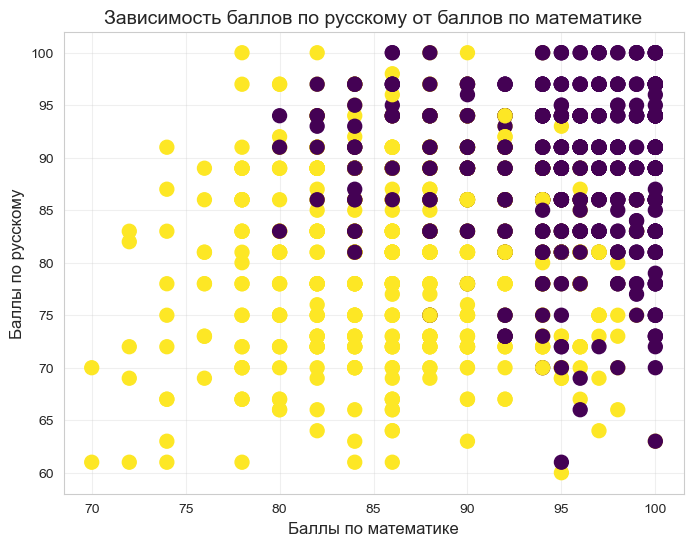

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(
    x=cleaned_entrants_2['математика'],
    y=cleaned_entrants_2['русский'],
    c=cleaned_entrants_2['Кластер'],
    cmap='viridis',
    s=100
)
plt.title('Зависимость баллов по русскому от баллов по математике', fontsize=14)
plt.xlabel('Баллы по математике', fontsize=12)
plt.ylabel('Баллы по русскому', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

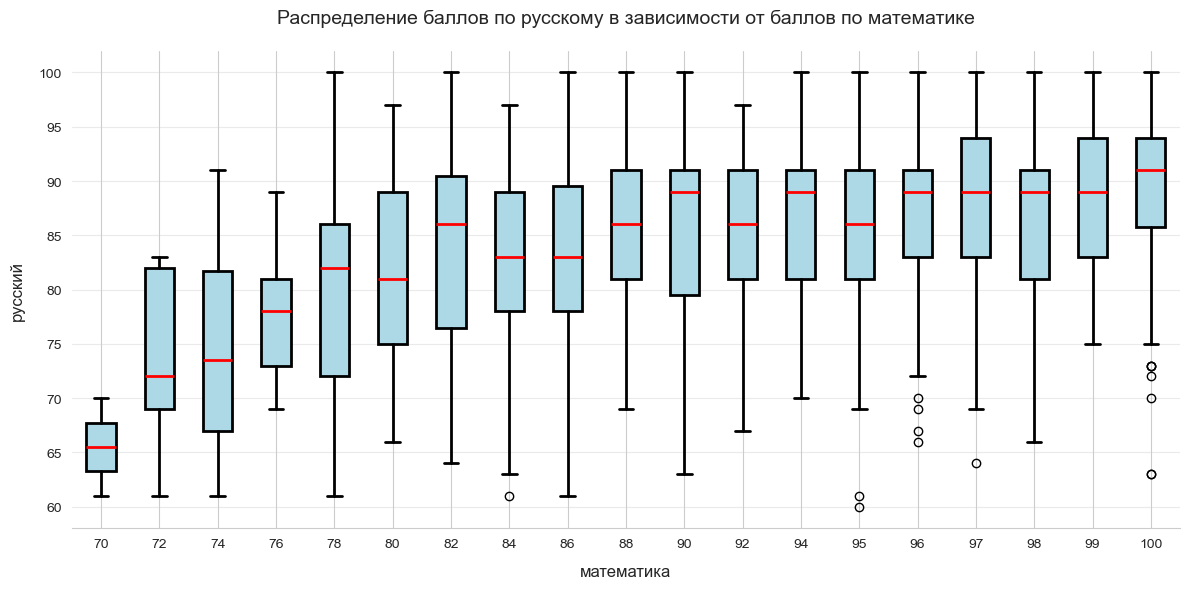

In [30]:
# Создаем сводную таблицу и boxplot
pivot_data = cleaned_entrants_2.pivot_table(index='№', columns='математика', values='русский')

# Настраиваем график
plt.figure(figsize=(12, 6))  # Размер графика
sns.set_style("whitegrid")  # Стиль с сеткой

# Рисуем boxplot с улучшенным оформлением
pivot_data.boxplot(
    patch_artist=True,  # Заливка цветом
    boxprops=dict(facecolor='lightblue', linewidth=2),  # Свойства ящиков
    whiskerprops=dict(linewidth=2),  # Свойства усов
    capprops=dict(linewidth=2),  # Свойства ограничителей
    medianprops=dict(color='red', linewidth=2)  # Свойства медианы
)

# Добавляем подписи и заголовок
plt.title('Распределение баллов по русскому в зависимости от баллов по математике', fontsize=14, pad=20)
plt.xlabel('математика', fontsize=12, labelpad=10)
plt.ylabel('русский', fontsize=12, labelpad=10)

# Настраиваем шрифт подписей на осях
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Добавляем горизонтальную сетку для удобства чтения
plt.grid(axis='y', alpha=0.4)

# Убираем лишние рамки
sns.despine(left=True)

plt.tight_layout()  # Оптимизация расположения элементов
plt.show()

С русским языком такой корелляции не прослеживается. Это объяснимо: знание физики и математики связано друг с другом, как и способность студента одновременно хорошо сдать математику ДВИ и математику ЕГЭ. С русским языком же такой зависимости не наблюдается.